In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
#matplotlib.rcParams.update({'font.size': 15})
mpl.rcParams.update({'figure.dpi': 200})
# mpl.rcParams.update({'figure.figsize': (3,2)})
import pandas as pd
import seaborn as sns
from copy import deepcopy

import sys
import os
import subprocess
import glob
from collections import defaultdict
import scipy as sp
from scipy import special
from itertools import product

from scipy.io import savemat

In [33]:
def make_plots(data):
    fig, axs = plt.subplots(3,2, figsize=(7,8), tight_layout=True)
    dVs = data["dVs"]
    cmap = cm.viridis
    norm = colors.Normalize(vmin=dVs[0], vmax=dVs[-1])
    time = data["time"]
    
    axs[0,0].set_title(f"{1/data['beta']}, {time[-1]}")

    # Ib var
    ax = axs[0,0]
    arr = data["Ib_mean"]
    for i in range(len(arr)):
        ax.plot(time, arr[i], color=cmap(norm(dVs[i])))
    ax.set_ylabel(r"$\langle I_b \rangle$")
    ax.set_xlabel(r"$t$")

    # Ib var
    arr = data["Ib_var"]
    ax = axs[0,1]
    for i in range(len(arr)):
        ax.plot(time, arr[i], color=cmap(norm(dVs[i])))
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(1e-2, 1e4)
    ax.set_ylabel(r"$var(I_b)$")
    ax.set_xlabel(r"$t$")

    # MSD
    arr = data["MSD_bias"]
    ax = axs[1,0]
    for i in range(len(arr)):
        ax.plot(time, arr[i], color=cmap(norm(dVs[i])))
    ax.set_ylabel(r"$MSD$")
    ax.set_xlabel(r"$t$")

    # MSD2
    arr = data["MSD_bias"]
    ax = axs[1,1]
    for i in range(len(arr)):
        ax.plot(time, arr[i], color=cmap(norm(dVs[i])))
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel(r"$MSD$")
    ax.set_xlabel(r"$t$")

    # Q6
    arr = data["Q_bias"][0]
    ax = axs[2,0]
    for i in range(len(arr)):
        ax.plot(time, arr[i], color=cmap(norm(dVs[i])))
    ax.set_xscale('log')
    ax.set_ylabel(r"$Q(a=0.1)$")
    ax.set_xlabel(r"$t$")

    # Q10
    arr = data["Q_bias"][4]
    ax = axs[2,1]
    for i in range(len(arr)):
        ax.plot(time, arr[i], color=cmap(norm(dVs[i])))
    ax.set_xscale('log')
    ax.set_ylabel(r"$Q(a=0.5)$")
    ax.set_xlabel(r"$t$")

0.1 1
0.1 10
0.1 100
0.04 1
0.04 10
0.04 100
0.01 1
0.01 10
0.01 100
0.004 1
0.004 10
0.004 100


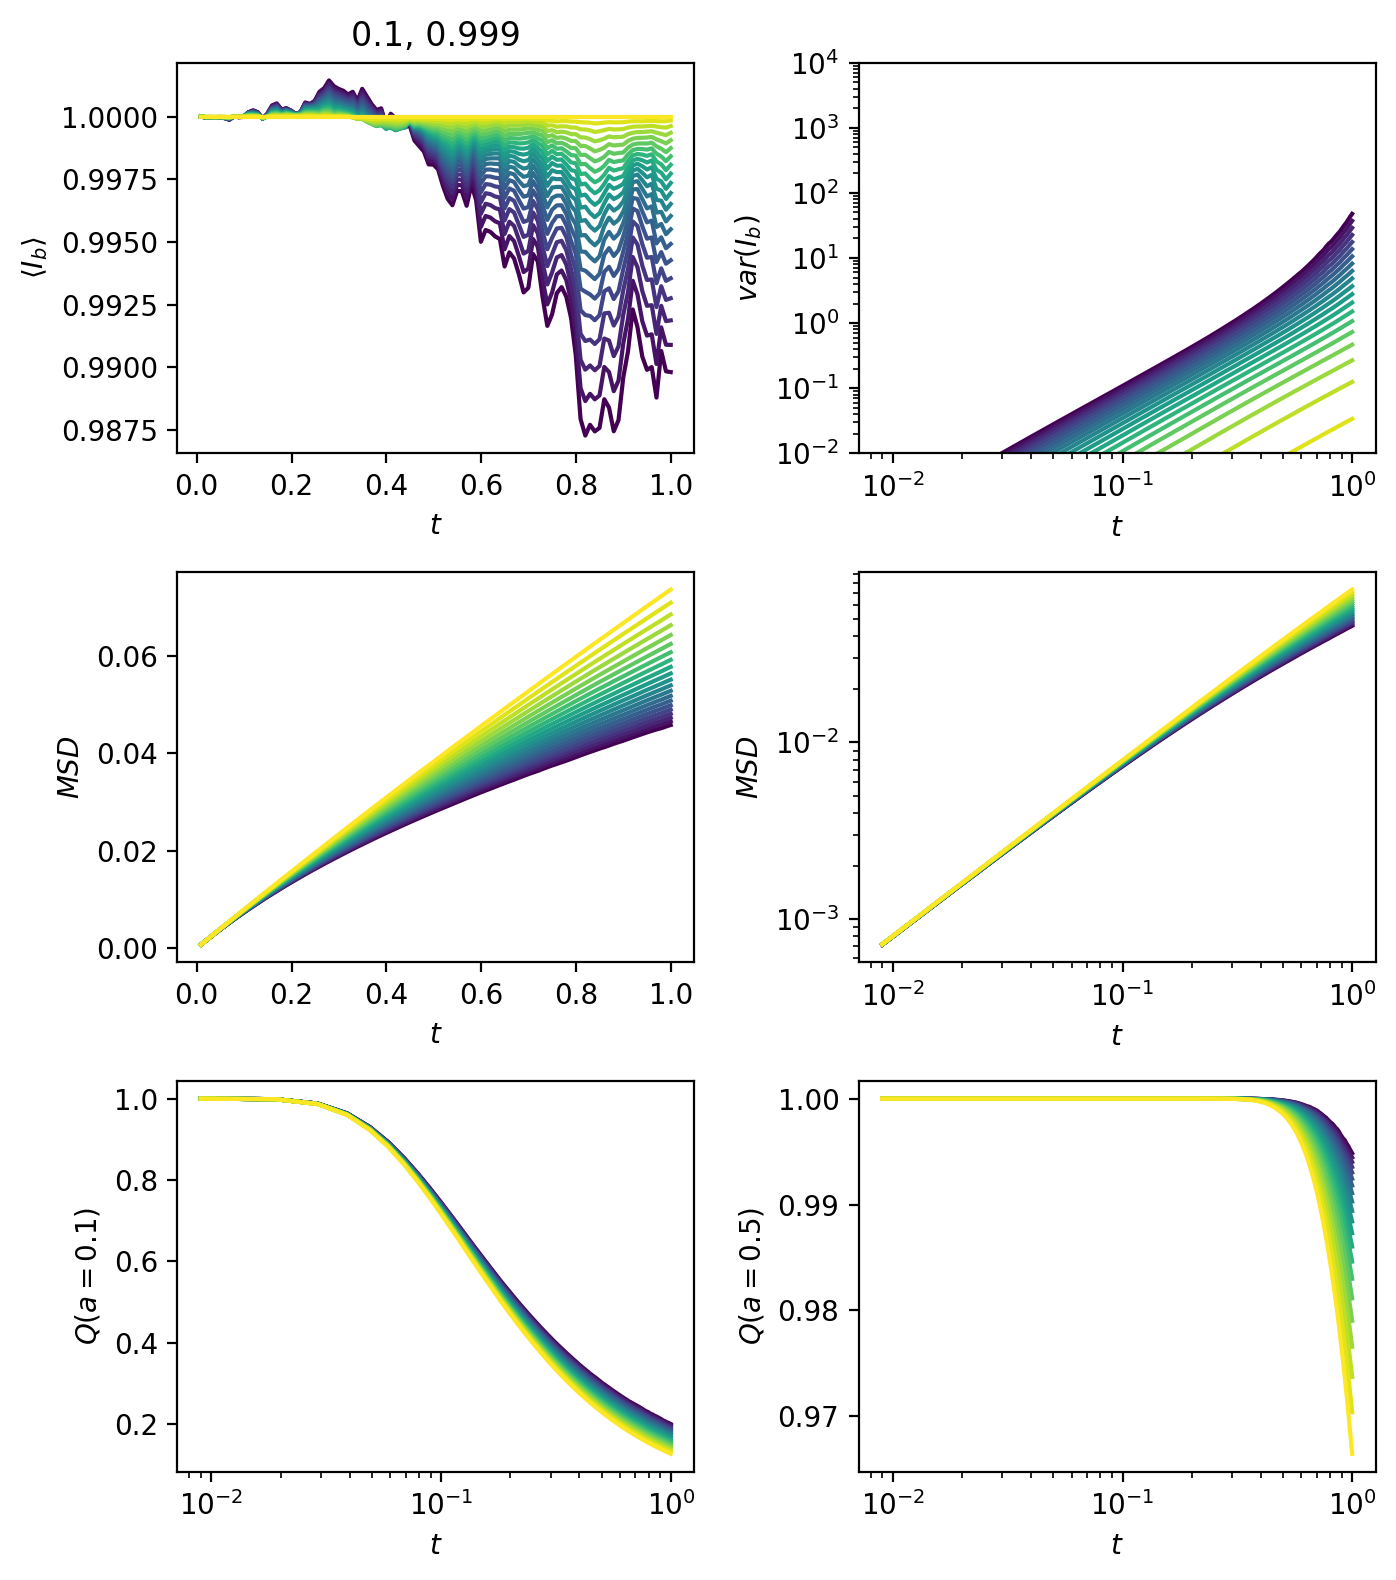

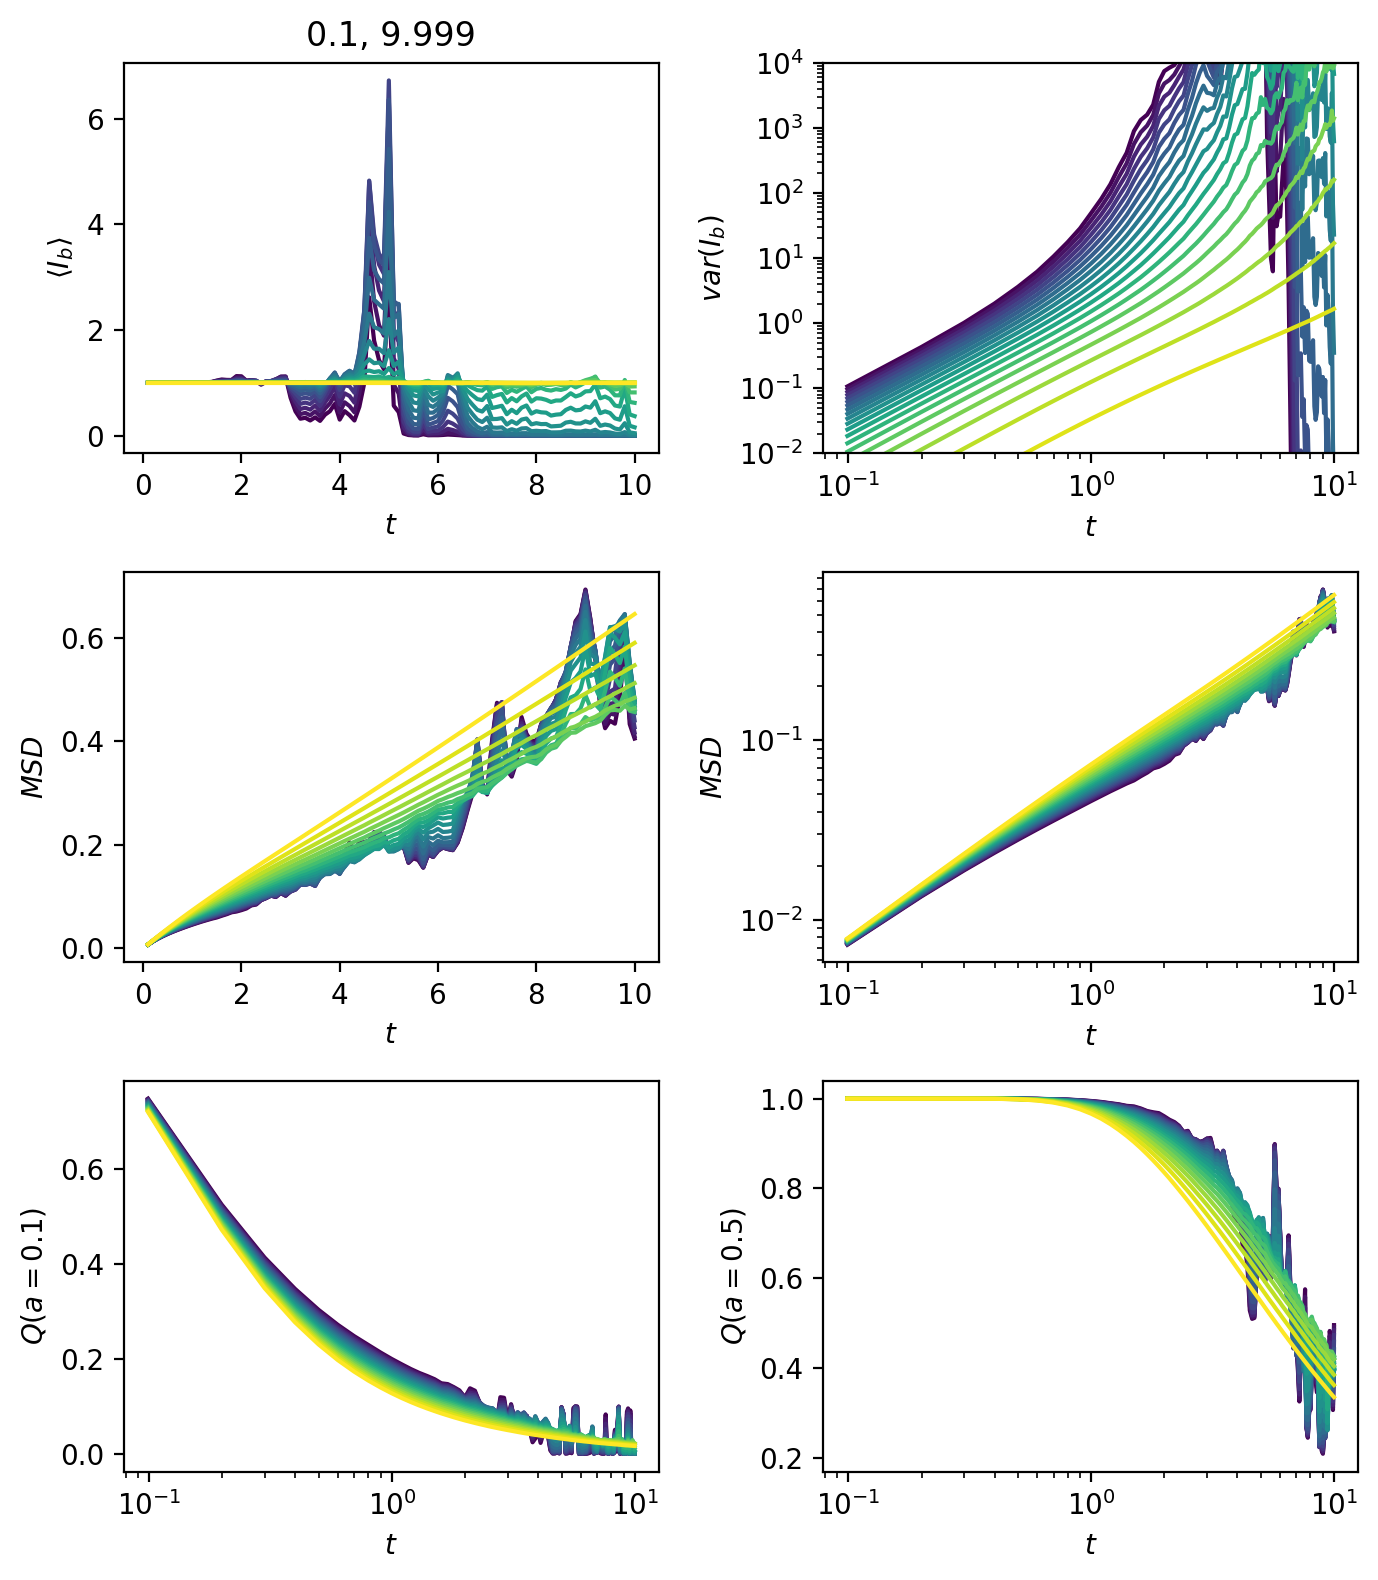

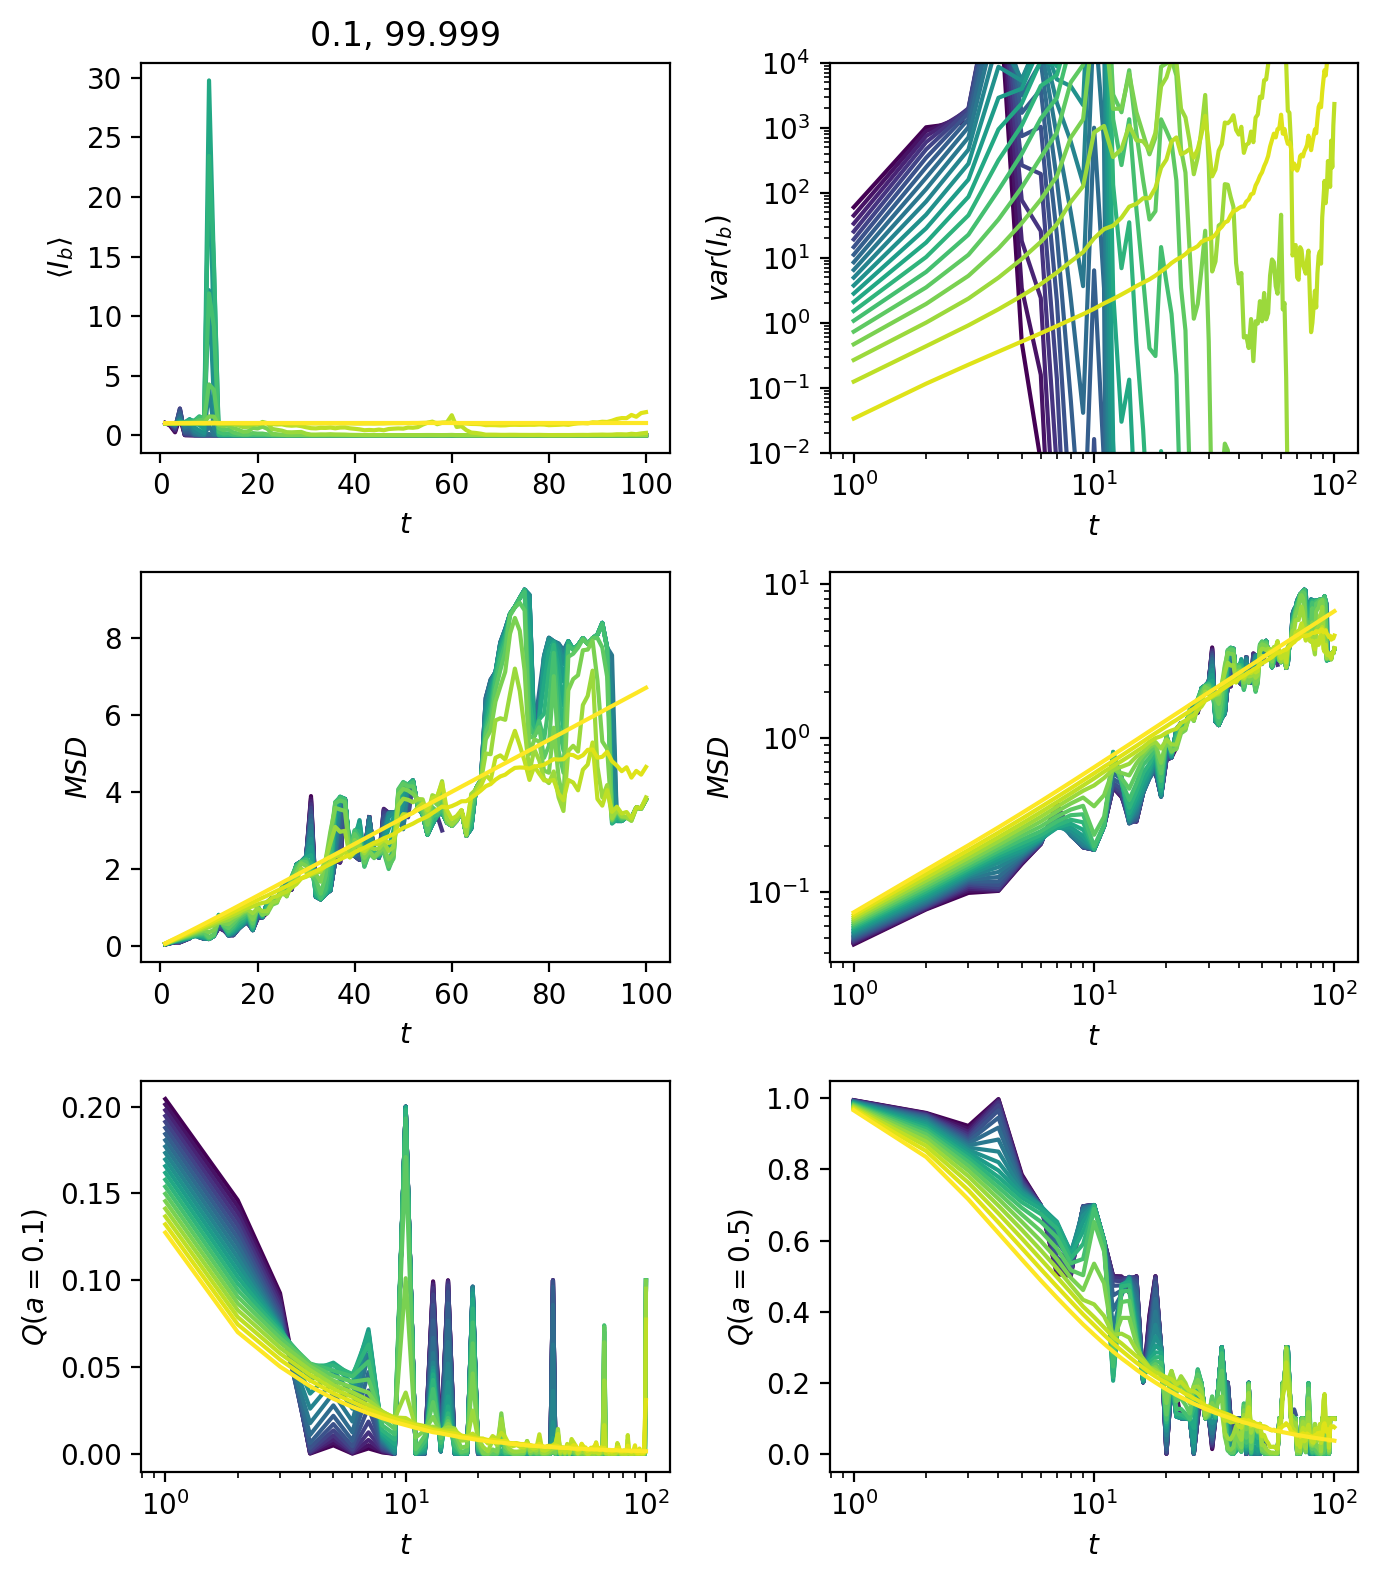

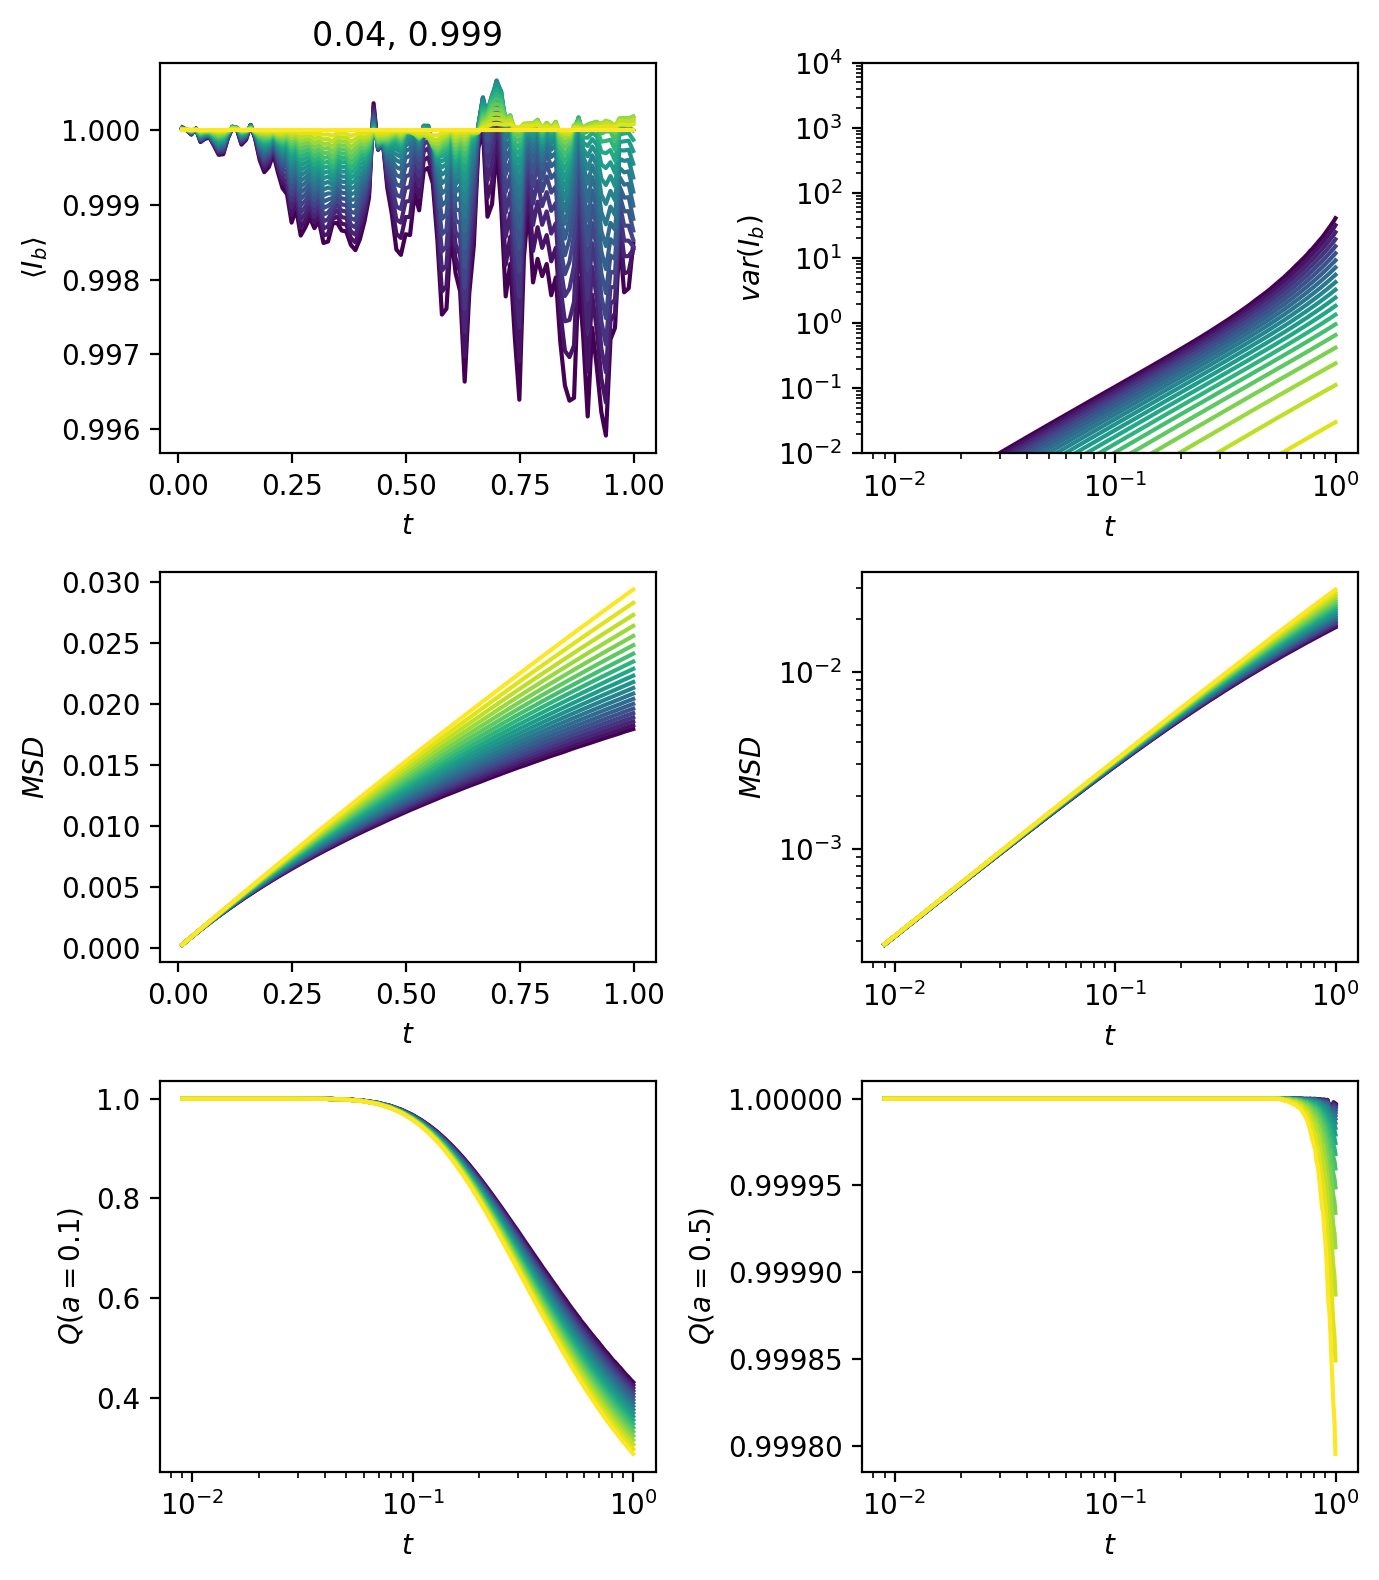

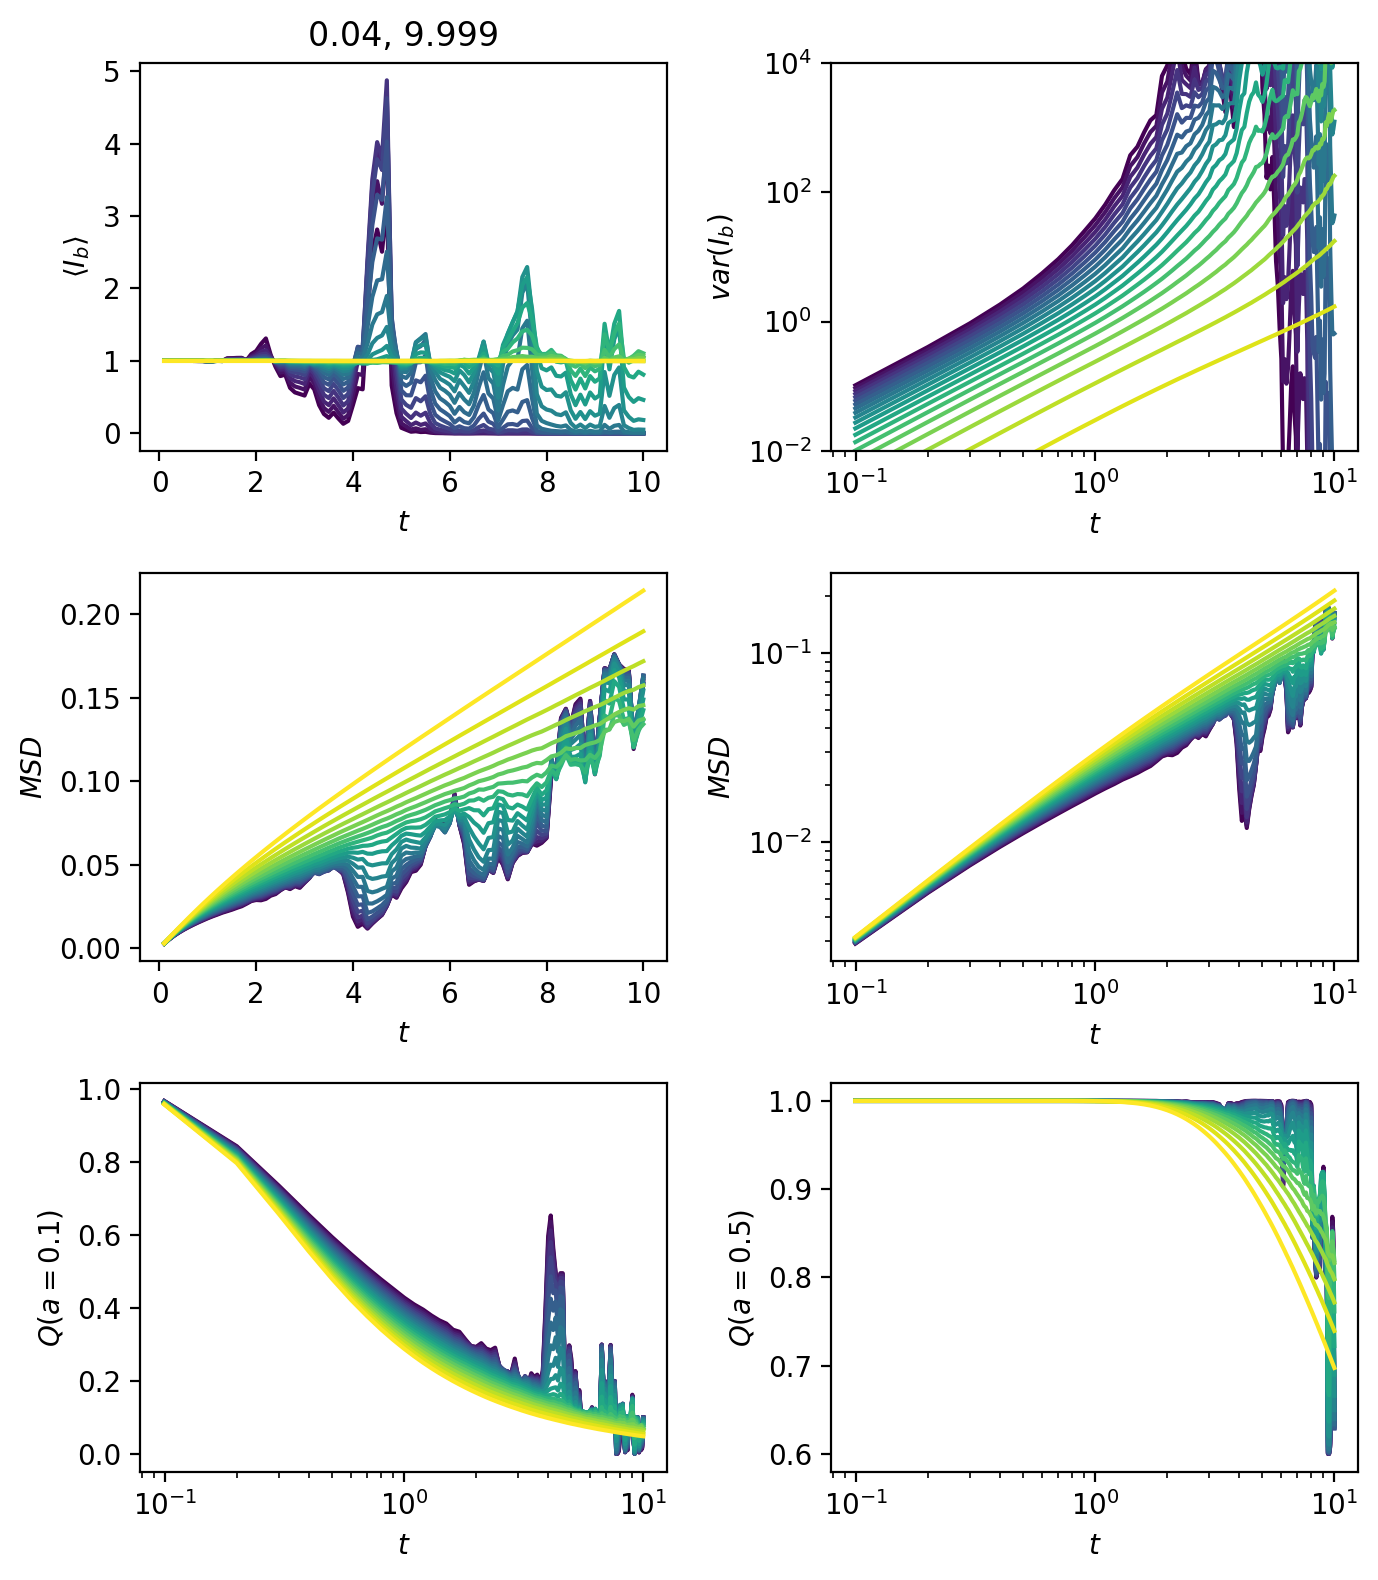

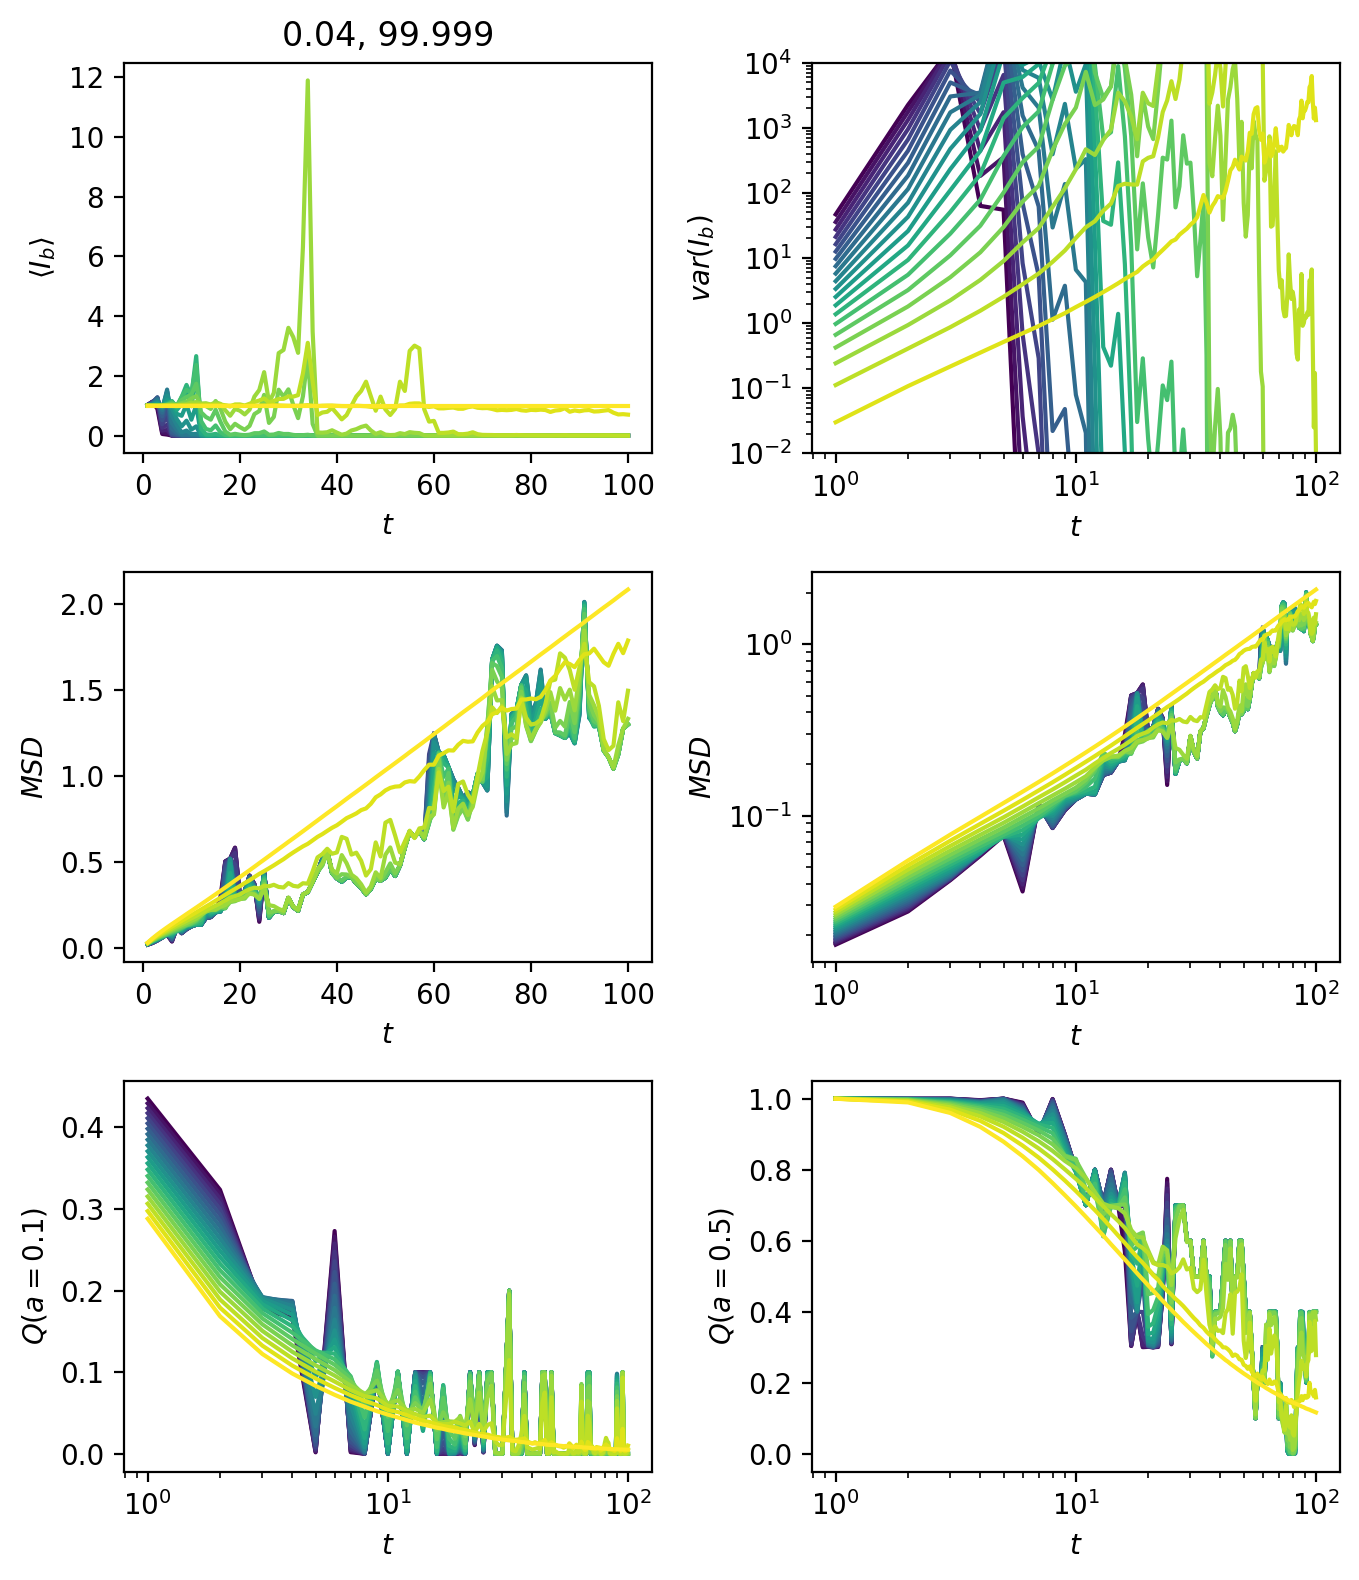

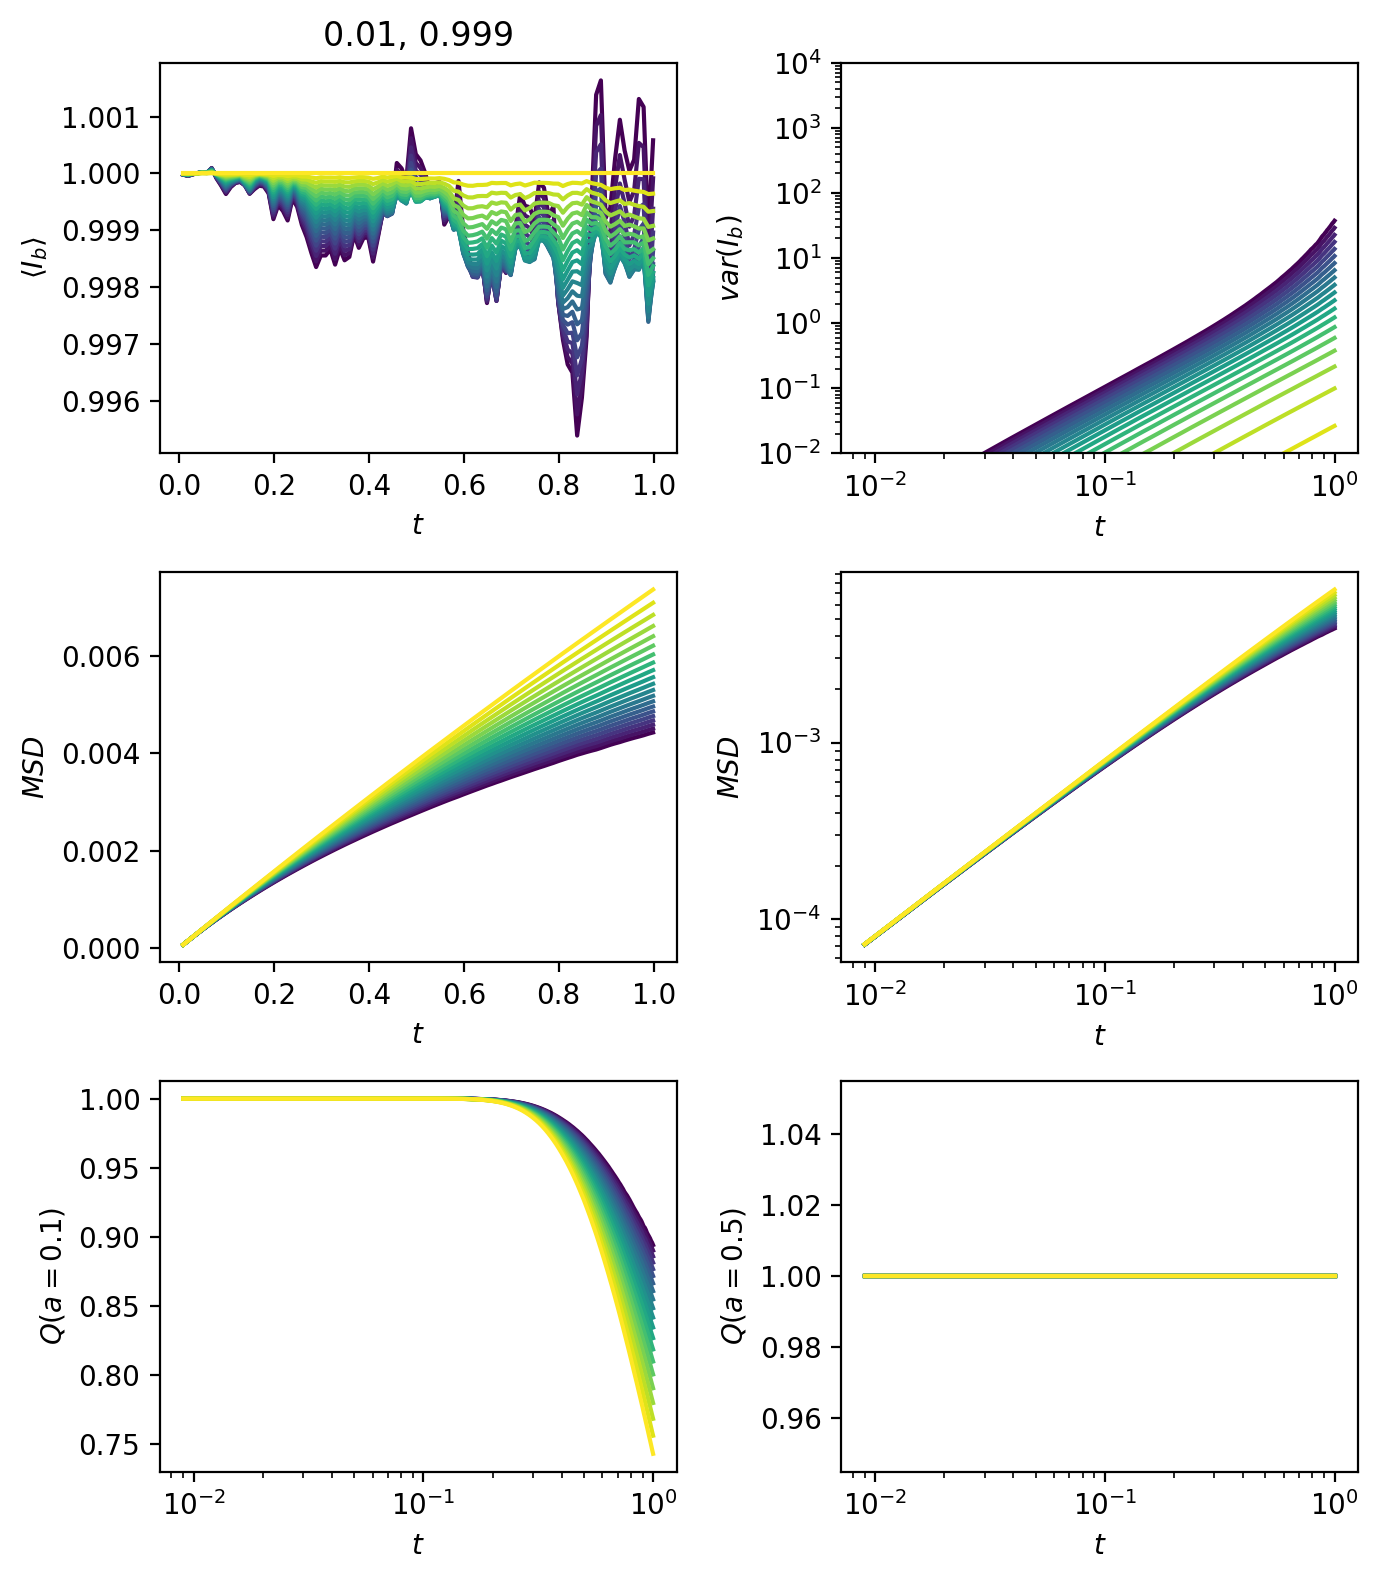

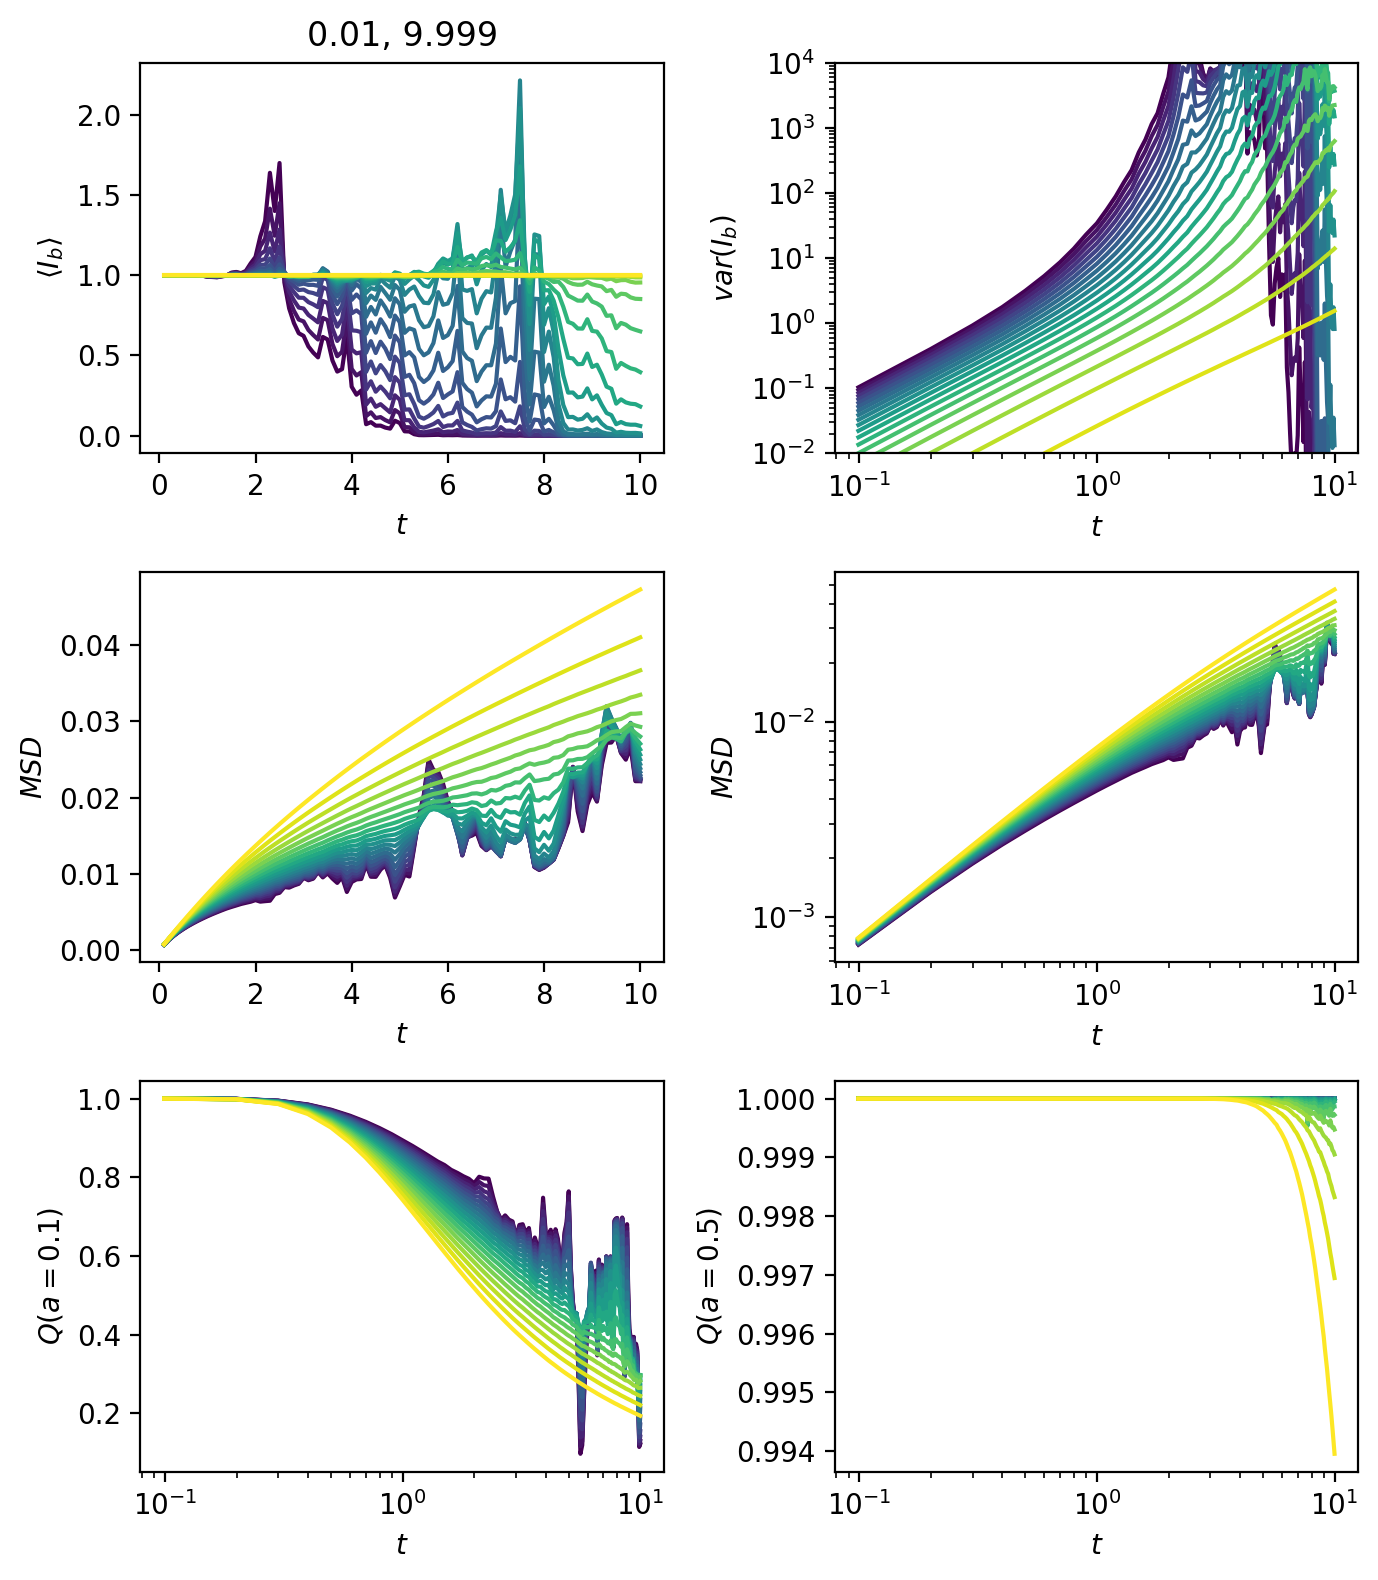

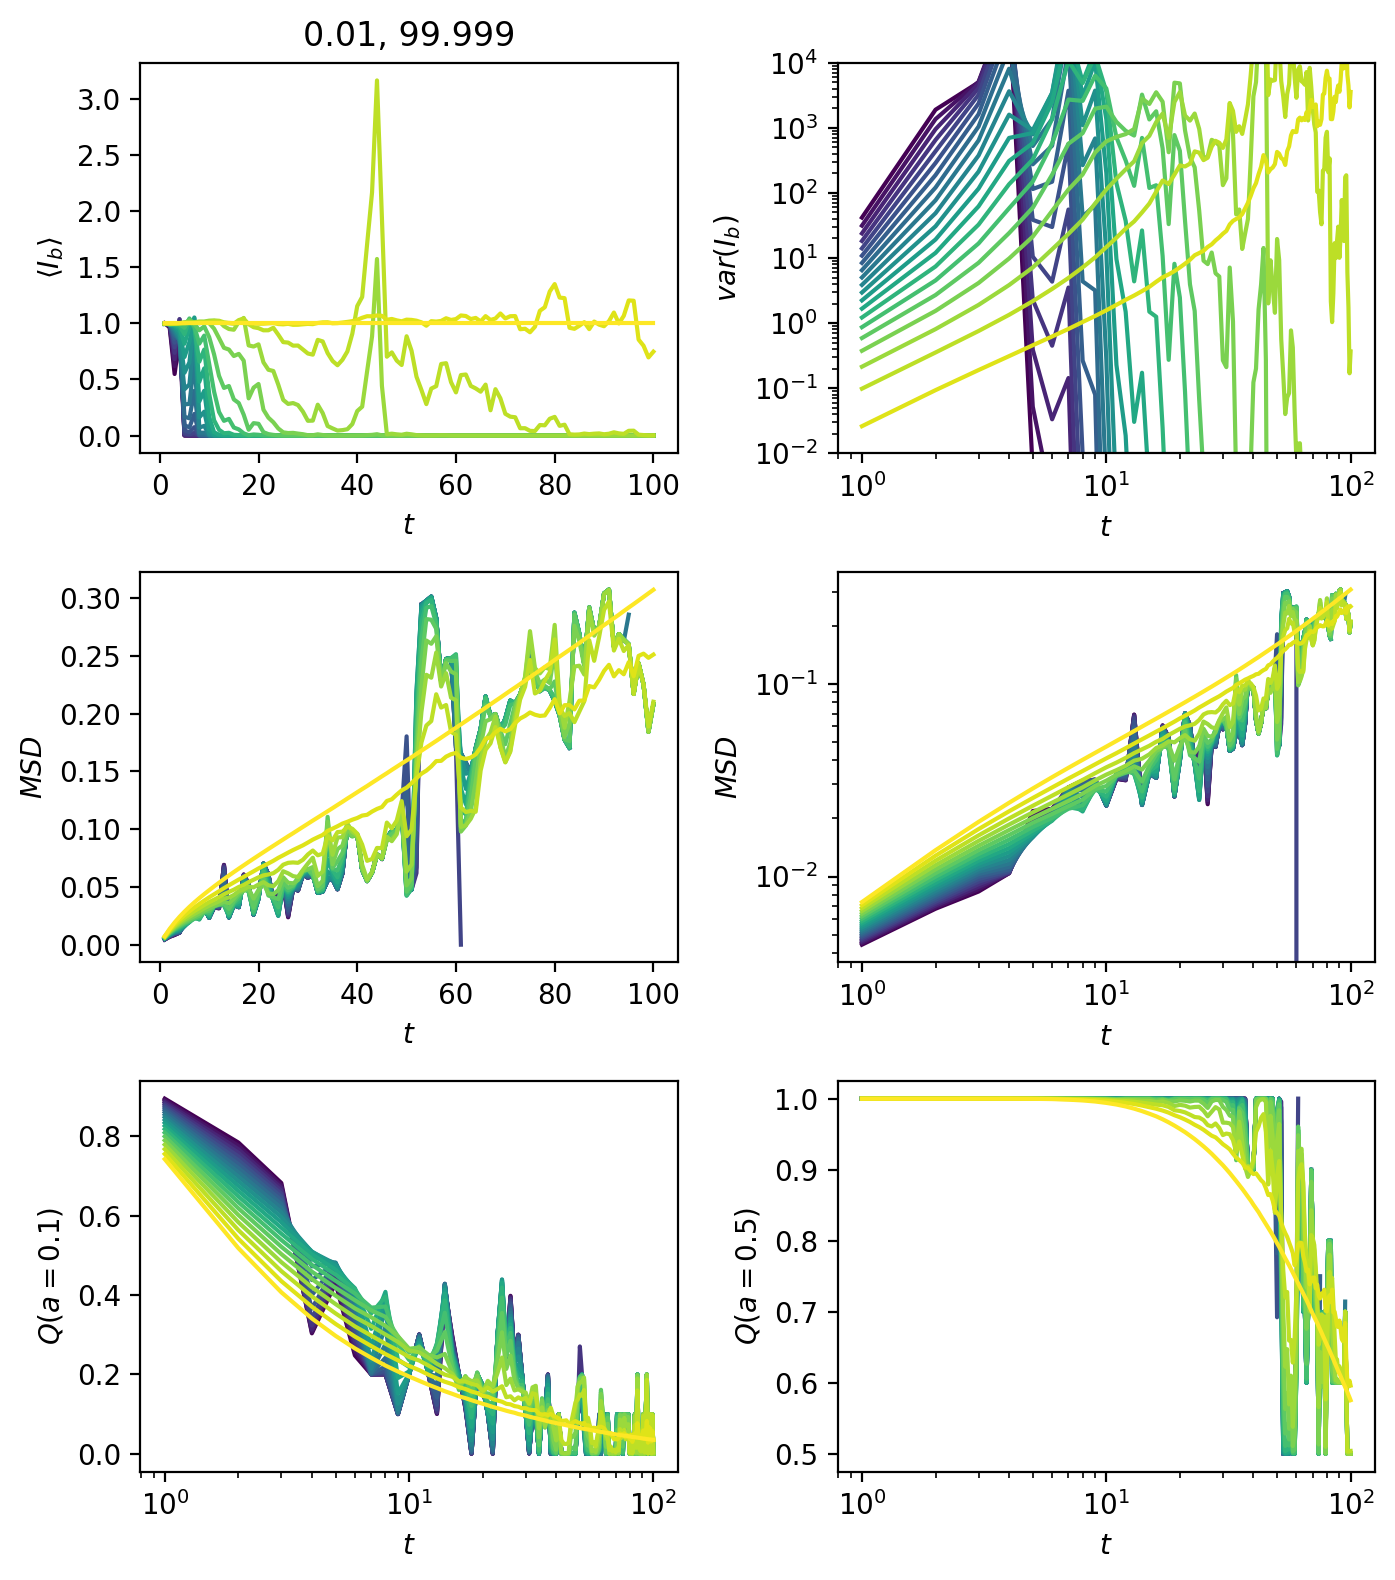

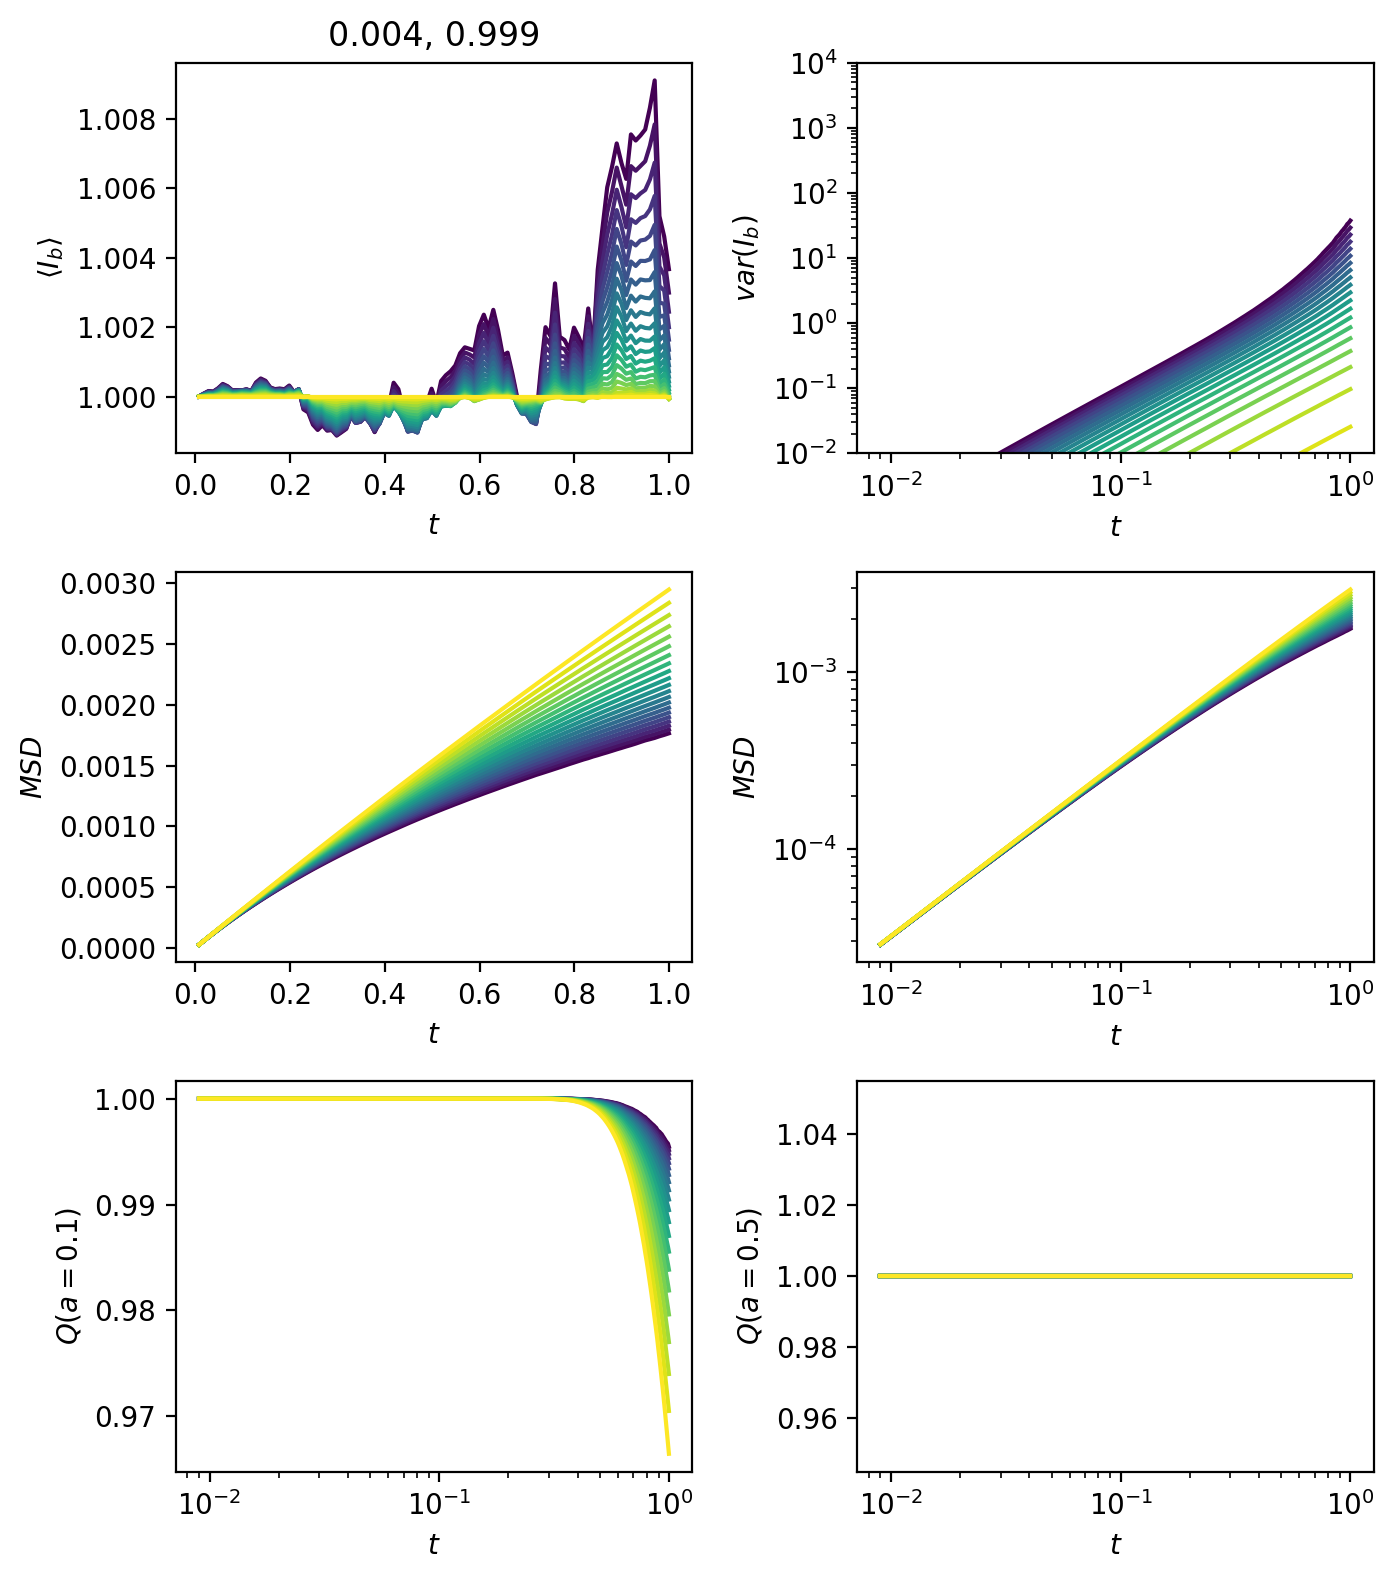

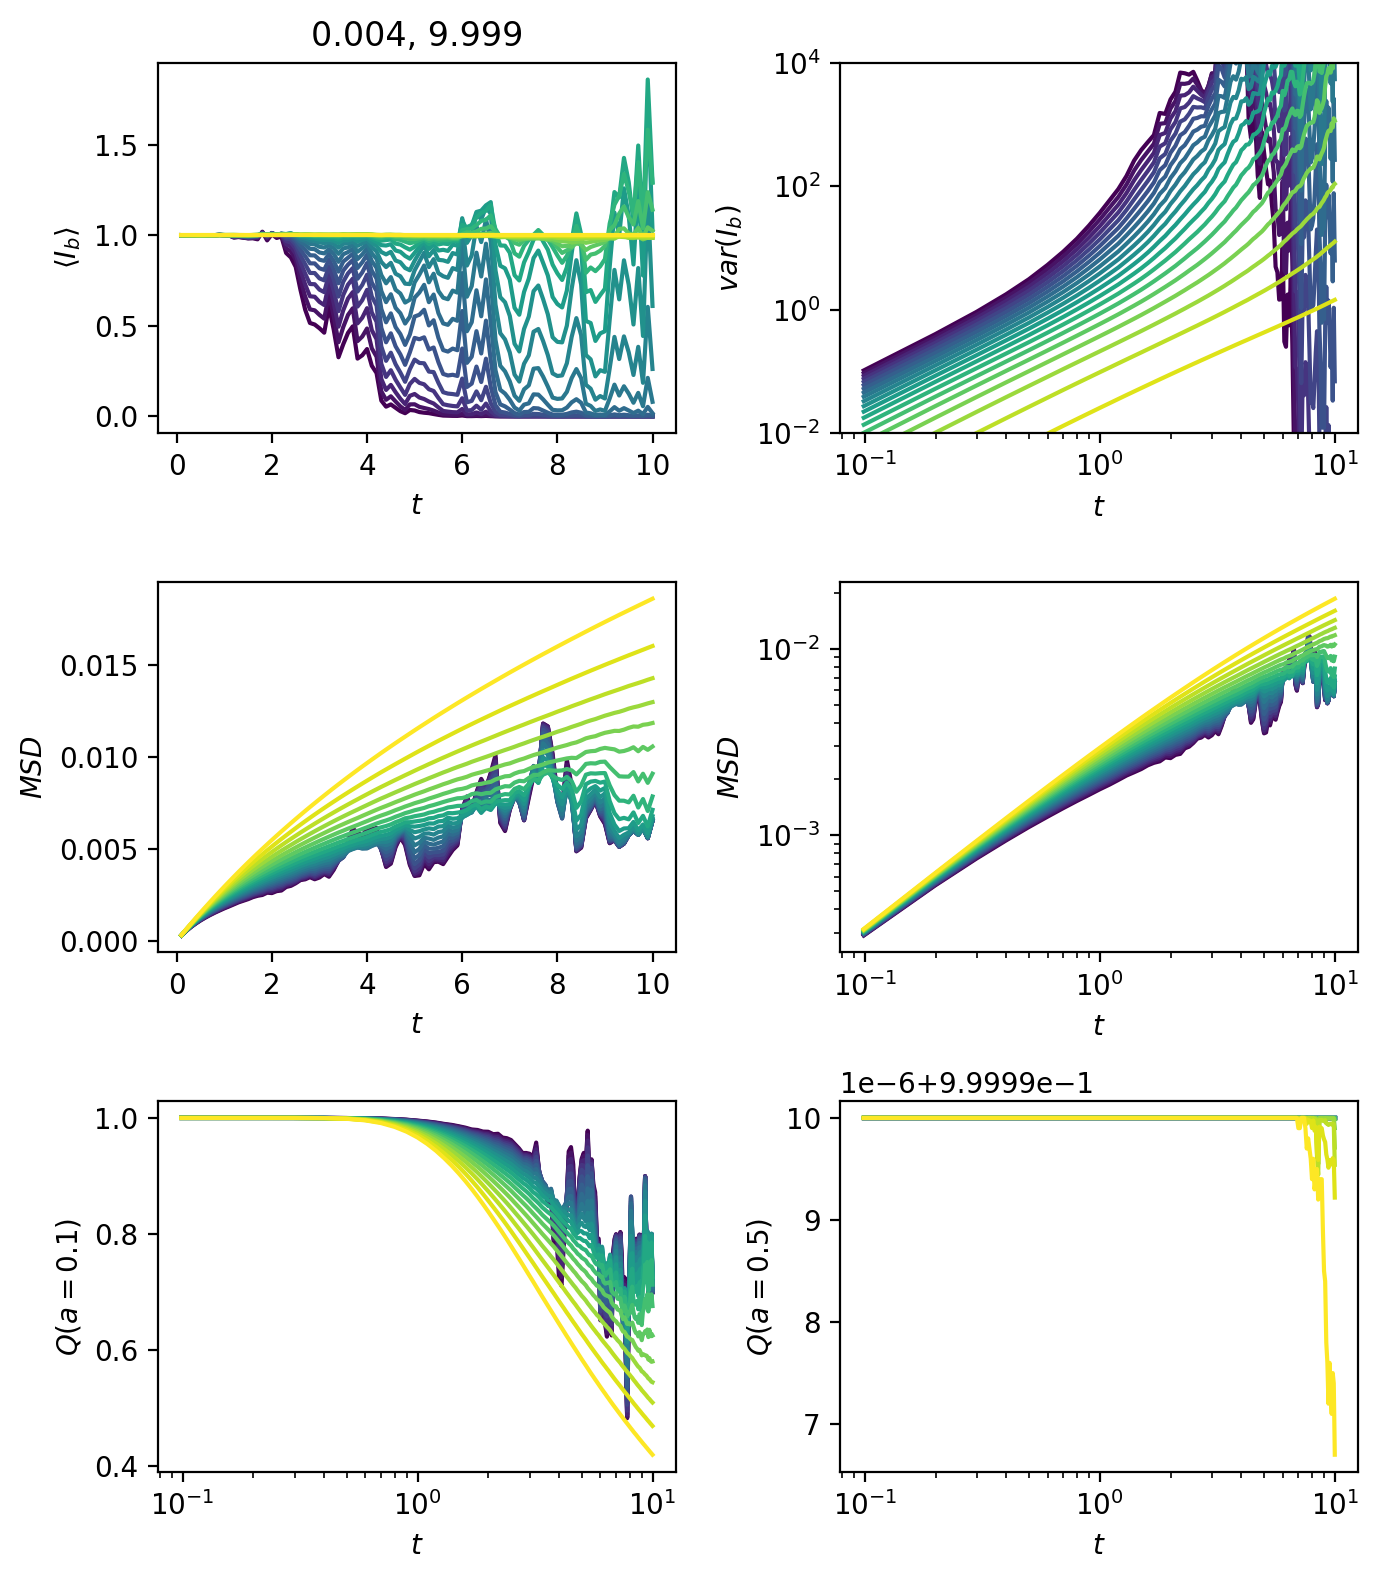

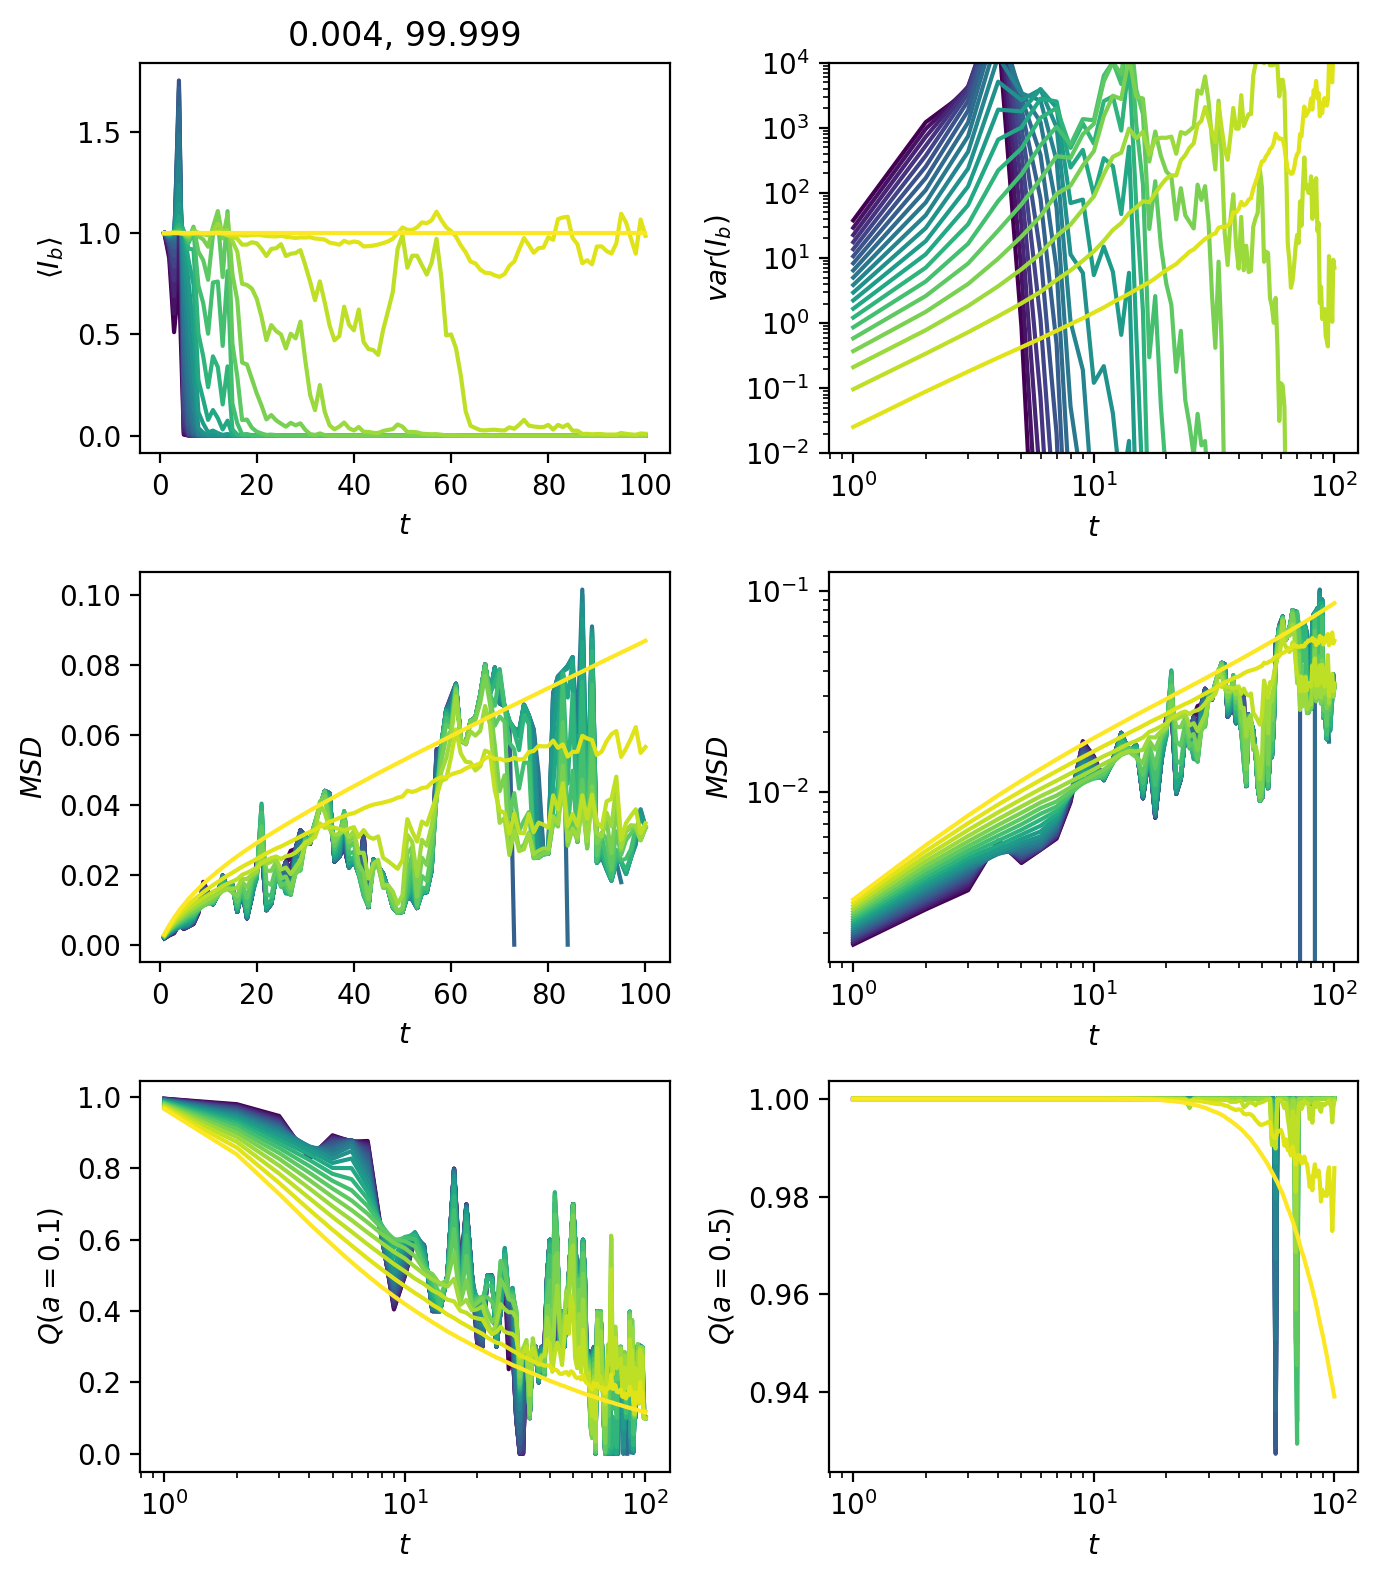

In [35]:
temps = [0.1, 0.04, 0.01, 0.004]
times = [1, 10, 100]
params = list(product(temps, times))
for temp, time in params:
    beta = 1/temp
    print(temp, time)

    data = dict(np.load(f"/home/igraham/data/md-lv/process_t-{temp}_time-{time}.npz"))
    make_plots(data)